In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv('/content/Advertising.csv',index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
data.shape

(200, 4)

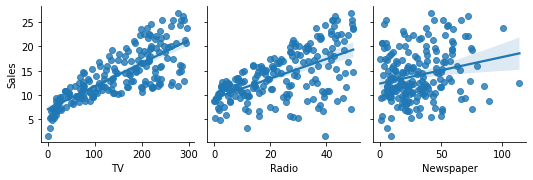

In [12]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
r = data[["TV", "Radio","Newspaper"]].values
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(r, i) for i in range(3)]
vif_df["feature"] = ["TV", "Radio","Newspaper"]
vif_df

,VIF,feature
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


In [21]:
X = data.drop(['Sales'], axis=1)
print(X)
y = data[["Sales"]]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


        TV  Radio  Newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]
     Sales
1     22.1
2     10.4
3      9.3
4     18.5
5     12.9
..     ...
196    7.6
197    9.7
198   12.8
199   25.5
200   13.4

[200 rows x 1 columns]


In [17]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
pred=model.predict(X_test)
from sklearn import metrics
arr=np.array(y_test["Sales"])
#print(metrics.classification_report(pred,arr))
pred=np.array(pred)
pred

array([[15.06836864],
       [15.72190708],
       [13.38980696],
       [ 9.75655963],
       [23.44987669],
       [ 9.69421423],
       [12.26513408],
       [ 9.98306587],
       [14.47767775],
       [14.97196552],
       [12.00330445],
       [21.2168659 ],
       [ 3.62734902],
       [17.97280908],
       [15.68750365],
       [ 9.28578522],
       [10.14761463],
       [10.74031353],
       [ 6.14753472],
       [16.42028793],
       [10.06621077],
       [16.48216559],
       [ 4.53474437],
       [16.88139038],
       [ 8.74026351],
       [17.35626546],
       [14.98501936],
       [12.66953511],
       [14.55552137],
       [20.79532422],
       [ 8.13632258],
       [16.46533538],
       [18.33077347],
       [14.01941831],
       [17.90359056],
       [14.80001021],
       [14.04578954],
       [17.13096134],
       [ 7.04910238],
       [12.63152165]])

In [34]:
arr=np.array((y_test["Sales"]))
arr

array([15.2, 14.7, 12.9,  9.6, 24.4, 10.3, 11.7, 11.2, 13.6, 13.4, 10.8,
       21.8,  4.8, 15. , 12. , 10.7, 11.6,  9.2,  7.2, 15.9, 10.1, 16.9,
        7.3, 15.7,  5.3, 17. , 15. ,  7.2, 11.9, 22.6,  9.7, 17.3, 19. ,
       12.2, 18.3, 14.7, 12.9, 15.9,  8.6, 11.7])

In [39]:
model.score(X_test,y_test)

0.8508891379360347

In [40]:
import joblib

In [41]:
joblib.dump(model,"Sales_model.joblib")

['Sales_model.joblib']